<a href="https://colab.research.google.com/github/ashkanallahyari/Telco_Customer_Churn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kaggle - Telco Customer Churn**
https://www.kaggle.com/datasets/blastchar/telco-customer-churn?utm_source=chatgpt.com

# **Extracting data**

## Downloading data

In [ ]:
# Uploading personal kaggle API

# !pip install kagglehub[pandas-datasets]
# from google.colab import files
# files.upload()

# import os
# import shutil

# os.makedirs("/root/.kaggle", exist_ok=True)
# shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
# os.chmod("/root/.kaggle/kaggle.json", 0o600)

Saving kaggle.json to kaggle.json


In [ ]:
# Downloading the dataset
# !pip install kaggle
!kaggle datasets download -d blastchar/telco-customer-churn

# Unzipping the dataset
import zipfile

with zipfile.ZipFile("telco-customer-churn.zip", "r") as zip_ref:
    zip_ref.extractall("telco-customer-churn")

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 382MB/s]


## Extracting data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#4169E1', '#FF6F61', '#2A9D8F', '#FFB300', '#708090']

In [ ]:
df = pd.read_csv("/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: "No"})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype('float')

print(f"Shape of the dataset: {df.shape}")
df.head()

Shape of the dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Transformation, Understanding and Exploratory Data Analysis

**Variable	Description**

1.   customerID: Customer ID
2.   gender:	Whether the customer is a male or a female
3.   SeniorCitizen:	Whether the customer is a senior citizen or not (1 = Yes, 0 = No)
4.   Partner:	Whether the customer has a partner or not (Yes, No)
5.   Dependents:	Whether the customer has dependents or not (Yes, No)
6.   Tenure:	Number of months the customer has stayed with the company
7.   PhoneService:	Whether the customer has a phone service or not (Yes, No)
8.   MultipleLines:	Whether the customer has multiple lines or not (Yes, No, No phone service)
9.   InternetService:	Customer’s internet service provider (DSL, Fiber optic, No)
10.  OnlineSecurity:	Whether the customer has online security or not (Yes, No, No internet service)
11.  OnlineBackup:	Whether the customer has online backup or not (Yes, No, No internet service)
12.  DeviceProtection:	Whether the customer has device protection or not (Yes, No, No internet service)
13.  TechSupport:	Whether the customer has tech support or not (Yes, No, No internet service)
14.  StreamingTV:	Whether the customer has streaming TV or not (Yes, No, No internet service)
15.  StreamingMovies:	Whether the customer has streaming movies or not (Yes, No, No internet service)
16.  Contract:	The contract term of the customer (Month-to-month, One year, Two year)
17.  PaperlessBilling:	Whether the customer has paperless billing or not (Yes, No)
18.  PaymentMethod:	The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19.  MonthlyCharges:	The amount charged to the customer monthly
20.  TotalCharges:	The total amount charged to the customer
21.  Churn:	Whether the customer churned or not (Yes or No)

**1. Overview & Sanity Checks**

*Get a high-level sense of data shape and quality*

*   We have a dataset of 7,043 observations on 20 attributes.
*   There is no missing in data except for TotalCharges

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*   On average, customers stay with the company for 32.3 months.
*   On average, they charged for 64.76 dollars.

In [ ]:
# Describing the quantitative fields
quantitative_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[quantitative_columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


*   About 84% of the customers are not seniors.
*   About 50% of the customers are male.
*   About 52% of the customers have a partner.
*   About 70% of the customers do not have dependents (children, spouse or partner, elderly family members, or others who rely on their income or support).
*   About 90% of the customers have phone service.
*   About 48% of the customers do not have multiple lines (options: Yes, No, No phone service).
*   About 44% of the customers use Fiber optic internet service.
*   About 50% of the customers do not have online security.
*   About 44% of the customers do not have online backup.
*   About 44% of the customers do not have device protection.
*   About 49% of the customers do not have tech support.
*   About 40% of the customers do not stream TV.
*   About 40% of the customers do not stream movies.
*   About 55% of the customers are on a month-to-month contract.
*   About 59% of the customers use paperless billing.
*   About 34% of the customers pay via electronic check.

In [ ]:
qualitative_columns = [
    'customerID', 'SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

df[qualitative_columns].describe()

,customerID,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,5901,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


**2. Customer Profile Analysis**

*Understand customer demographics*

*   Gender distribution is nearly balanced, with females making up 50.48% and males 49.52%, suggesting no strong gender skew in the dataset.
*   A slight majority of customers (51.70%) report having a partner, while 48.30% do not—indicating a diverse mix of household types.
*   The most striking contrast appears in the dependents chart: only 29.96% of customers have dependents, while a significant 70.04% do not, hinting at a predominantly independent or child-free customer population. Together, these visuals help contextualize customer behavior and inform segmentation strategies.

In [ ]:
# removing few rows with null values in TotalCharges
df = df.dropna()
print(f"data shape: {df.shape}")

data shape: (7032, 21)


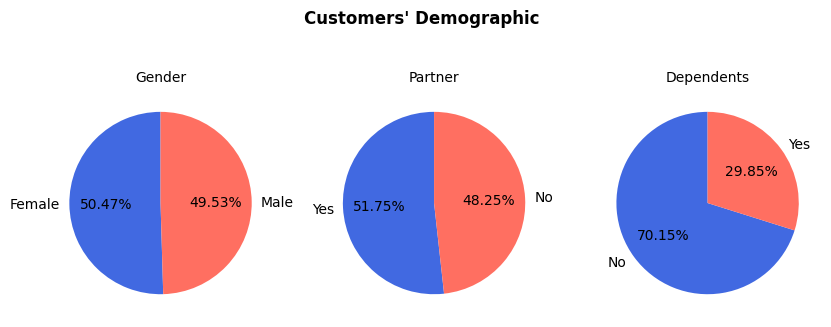

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

fig.suptitle("Customers' Demographic", fontsize=12, fontweight='bold')

ax[0].pie(df['gender'].value_counts(normalize=True), labels=df['gender'].unique() ,autopct='%1.2f%%', startangle=90, colors=colors)
ax[0].set_title('Gender', fontsize=10)
ax[1].pie(df['Partner'].value_counts(normalize=True), labels=df['Partner'].unique(), autopct='%1.2f%%', startangle=90, colors=colors)
ax[1].set_title('Partner', fontsize=10)
ax[2].pie(df['Dependents'].value_counts(normalize=True), labels=df['Dependents'].unique(), autopct='%1.2f%%', startangle=90, colors=colors)
ax[2].set_title('Dependents', fontsize=10)

plt.show()

**3. Service Usage Analysis**

*Explore how service subscriptions impact churn*

*   Most customers use phone service (90.33%), but only about half have multiple lines.
*   Internet service is widely adopted, with fiber optic slightly leading DSL, while 20.47% have no internet at all.
*   Among internet users, optional features like online security, backup, and tech support show lower adoption—each hovering around 30%.
*   Entertainment services like streaming TV and movies follow a similar trend.
*   Contract preferences lean heavily toward month-to-month plans (55.03%), and paperless billing is used by nearly 60%.
*   Payment methods are diverse, with electronic checks being the most common.

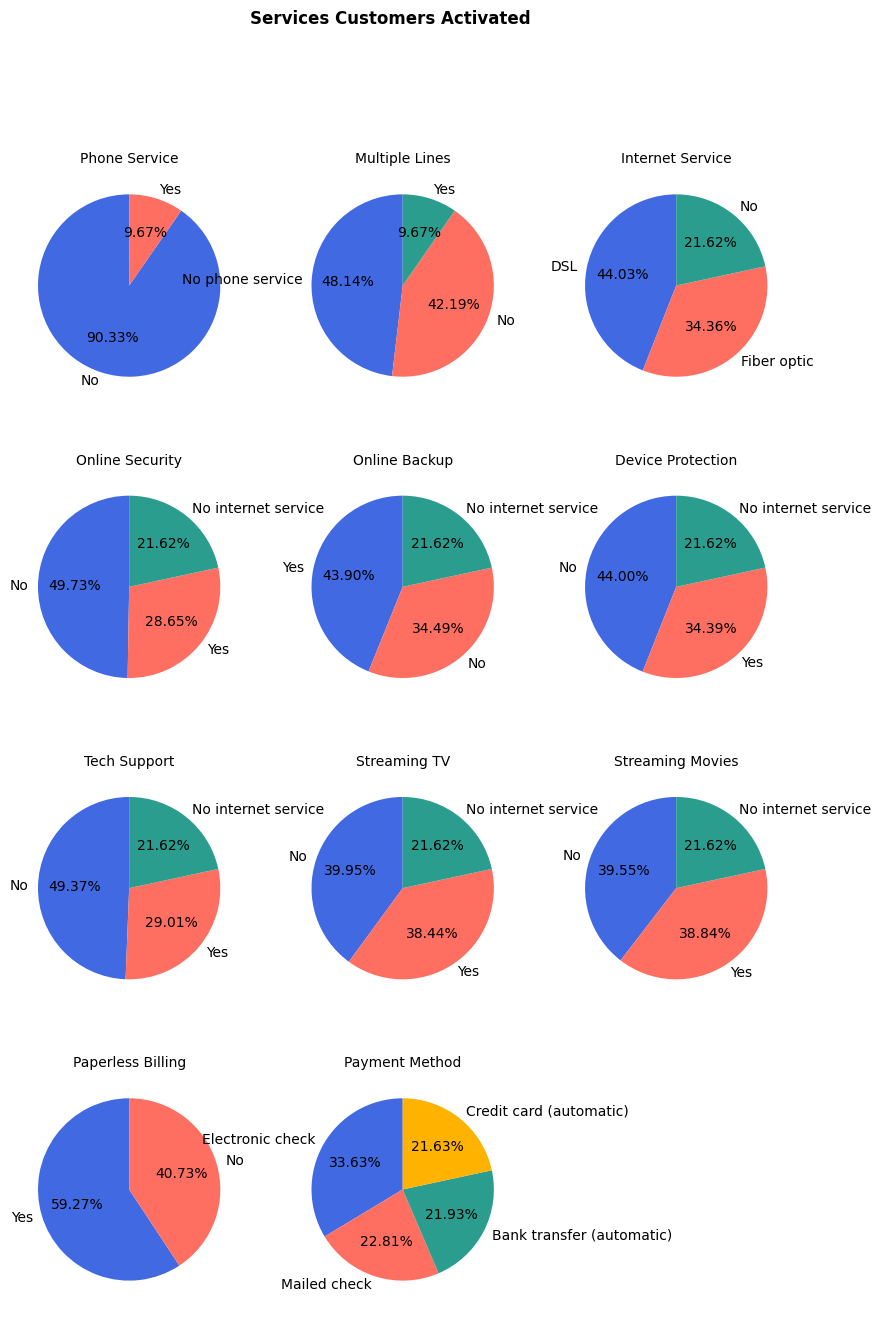

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(10, 15))

fig.suptitle("Services Customers Activated", fontsize=12, fontweight='bold')

ax[0, 0].pie(df['PhoneService'].value_counts(normalize=True), labels=df['PhoneService'].unique() ,autopct='%1.2f%%', startangle=90, colors=colors)
ax[0, 0].set_title('Phone Service', fontsize=10)
ax[0, 1].pie(df['MultipleLines'].value_counts(normalize=True), labels=df['MultipleLines'].unique(), autopct='%1.2f%%', startangle=90, colors=colors)
ax[0, 1].set_title('Multiple Lines', fontsize=10)
ax[0, 2].pie(df['InternetService'].value_counts(normalize=True), labels=df['InternetService'].unique(), autopct='%1.2f%%', startangle=90, colors=colors)
ax[0, 2].set_title('Internet Service', fontsize=10)

ax[1, 0].pie(df['OnlineSecurity'].value_counts(normalize=True), labels=df['OnlineSecurity'].unique() ,autopct='%1.2f%%', startangle=90, colors=colors)
ax[1, 0].set_title('Online Security', fontsize=10)
ax[1, 1].pie(df['OnlineBackup'].value_counts(normalize=True), labels=df['OnlineBackup'].unique() ,autopct='%1.2f%%', startangle=90, colors=colors)
ax[1, 1].set_title('Online Backup', fontsize=10)
ax[1, 2].pie(df['DeviceProtection'].value_counts(normalize=True), labels=df['DeviceProtection'].unique() ,autopct='%1.2f%%', startangle=90, colors=colors)
ax[1, 2].set_title('Device Protection', fontsize=10)

ax[2, 0].pie(df['TechSupport'].value_counts(normalize=True), labels=df['TechSupport'].unique() ,autopct='%1.2f%%', startangle=90, colors=colors)
ax[2, 0].set_title('Tech Support', fontsize=10)
ax[2, 1].pie(df['StreamingTV'].value_counts(normalize=True), labels=df['StreamingTV'].unique() ,autopct='%1.2f%%', startangle=90, colors=colors)
ax[2, 1].set_title('Streaming TV', fontsize=10)
ax[2, 2].pie(df['StreamingMovies'].value_counts(normalize=True), labels=df['StreamingMovies'].unique() ,autopct='%1.2f%%', startangle=90, colors=colors)
ax[2, 2].set_title('Streaming Movies', fontsize=10)

ax[3, 0].pie(df['PaperlessBilling'].value_counts(normalize=True), labels=df['PaperlessBilling'].unique() ,autopct='%1.2f%%', startangle=90, colors=colors)
ax[3, 0].set_title('Paperless Billing', fontsize=10)
ax[3, 1].pie(df['PaymentMethod'].value_counts(normalize=True), labels=df['PaymentMethod'].unique() ,autopct='%1.2f%%', startangle=90, colors=colors)
ax[3, 1].set_title('Payment Method', fontsize=10)
ax[3, 2].axis('off')

plt.show()

**4. Contract & Billing Behavior**

*Study financial and contractual behavior*

*   Most customers prefer month-to-month contracts (55.02%), showing a desire for flexibility.
*   Monthly and total charges vary widely, with averages of €64.76 and €2,283.30, reflecting diverse usage and tenure.

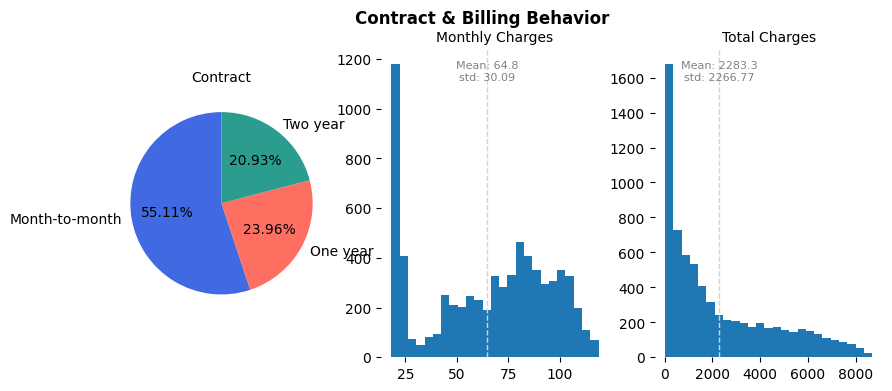

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

fig.suptitle("Contract & Billing Behavior", fontsize=12, fontweight='bold')

ax[0].pie(df['Contract'].value_counts(normalize=True), labels=df['Contract'].unique() ,autopct='%1.2f%%', startangle=90, colors=colors)
ax[0].set_title('Contract', fontsize=10)

ax[1].hist(df['MonthlyCharges'], bins=25)
ax[1].set_title('Monthly Charges', fontsize=10)
ax[1].axvline(x=df['MonthlyCharges'].mean(), color='lightgray', linestyle='--', linewidth=1)
ax[1].text(df['MonthlyCharges'].mean(), ax[1].get_ylim()[1]*0.9, 'Mean: '+str(round(df['MonthlyCharges'].mean(), 2))+'\nstd: '+str(round(df['MonthlyCharges'].std(), 2)), color='grey', ha='center', fontsize=8)
for spine in ax[1].spines.values():
  spine.set_visible(False)

ax[2].hist(df['TotalCharges'], bins=25)
ax[2].set_title('Total Charges', fontsize=10)
ax[2].axvline(x=df['TotalCharges'].mean(), color='lightgray', linestyle='--', linewidth=1)
ax[2].text(df['TotalCharges'].mean(), ax[2].get_ylim()[1]*0.9, 'Mean: '+str(round(df['TotalCharges'].mean(), 2))+'\nstd: '+str(round(df['TotalCharges'].std(), 2)), color='grey', ha='center', fontsize=8)
for spine in ax[2].spines.values():
  spine.set_visible(False)

plt.show()

Outliers detected using the Interquartile Range (IQR)

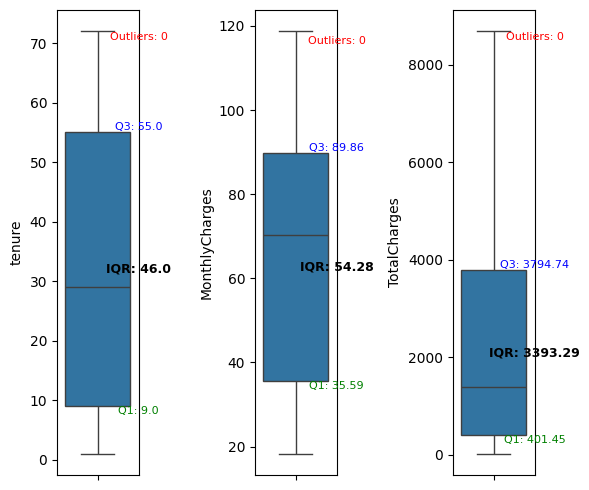

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(6, 5))

for n, ax in enumerate(axs):
    col = quantitative_columns[n]
    sns.boxplot(y=col, data=df, ax=ax)

    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = outliers.shape[0]

    # Annotate IQR
    ax.text(0.5, Q3, f"Q3: {round(Q3, 2)}", ha='center', va='bottom', fontsize=8, color='blue')
    ax.text(0.5, Q1, f"Q1: {round(Q1, 2)}", ha='center', va='top', fontsize=8, color='green')
    ax.text(0.5, (Q1 + Q3) / 2, f"IQR: {round(IQR, 2)}", ha='center', va='center', fontsize=9, fontweight='bold')

    # Annotate outlier count
    ax.text(0.5, ax.get_ylim()[1]*0.95, f"Outliers: {outlier_count}", ha='center', va='top', fontsize=8, color='red')

plt.tight_layout()
plt.show()


**5. Correlation & Feature Relationships**

*Quantify relationships*

*   There is a strong positive correlation between 'Tenure' and 'TotalCharges', indicating that customers with longer tenure tend to have paid more over time.

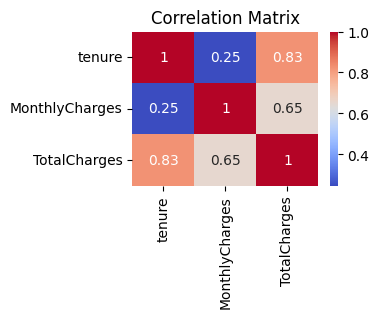

In [ ]:
corr_matrix = df[quantitative_columns].corr()

plt.figure(figsize=(3, 2))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()

**6. Customer Tenure & Loyalty**

*Relate loyalty to churn*

*   The histogram shows a wide spread in tenure, with a mean of 32.37 months and a standard deviation of 24.56—indicating both short-term and long-term users.
*   Meanwhile, the churn pie chart reveals that 26.54% of customers have left, while 73.46% remain, suggesting a relatively stable customer base with room to improve retention (Imbalanced Dataset).

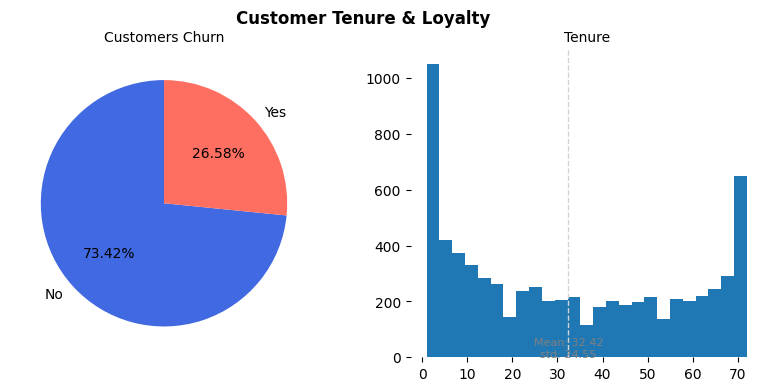

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle("Customer Tenure & Loyalty", fontsize=12, fontweight='bold')

ax[0].pie(df['Churn'].value_counts(normalize=True), labels=df['Churn'].value_counts().index, autopct='%1.2f%%', startangle=90, colors=colors)
ax[0].set_title('Customers Churn', fontsize=10)

ax[1].hist(df['tenure'], bins=25)
ax[1].set_title('Tenure', fontsize=10)
ax[1].axvline(x=df['tenure'].mean(), color='lightgray', linestyle='--', linewidth=1)
ax[1].text(df['tenure'].mean(), ax[0].get_ylim()[1]*0.9, 'Mean: '+str(round(df['tenure'].mean(), 2))+'\nstd: '+str(round(df['tenure'].std(), 2)), color='grey', ha='center', fontsize=8)
for spine in ax[1].spines.values():
  spine.set_visible(False)


plt.show()

*   The categorical variables that show no  statistically significant difference in churn rates across their categories (p-value > 0.05) are Gender and phone service

In [ ]:
from scipy.stats import chi2_contingency

# List of categorical variables
categorical_vars = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for var in categorical_vars:
  ct = pd.crosstab(df[var], df['Churn'])
  ct = ct.div(ct.sum(axis=1), axis=0) * 100
  ct = round(ct, 2)

  chi2, p, dof, expected = chi2_contingency(ct)

  print(ct)
  print("-" * 30)
  print(f"p_value: {round(p, 4)}")
  print()
  print("_" * 30)


Churn      No    Yes
gender              
Female  73.04  26.96
Male    73.80  26.20
------------------------------
p_value: 1.0

______________________________
Churn             No    Yes
SeniorCitizen              
No             76.35  23.65
Yes            58.32  41.68
------------------------------
p_value: 0.0102

______________________________
Churn       No    Yes
Partner              
No       67.02  32.98
Yes      80.28  19.72
------------------------------
p_value: 0.0491

______________________________
Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.47  15.53
------------------------------
p_value: 0.0138

______________________________
Churn            No    Yes
PhoneService              
No            75.00  25.00
Yes           73.25  26.75
------------------------------
p_value: 0.9036

______________________________
Churn                No    Yes
MultipleLines                 
No                74.92  25.08
No phone service  75.00

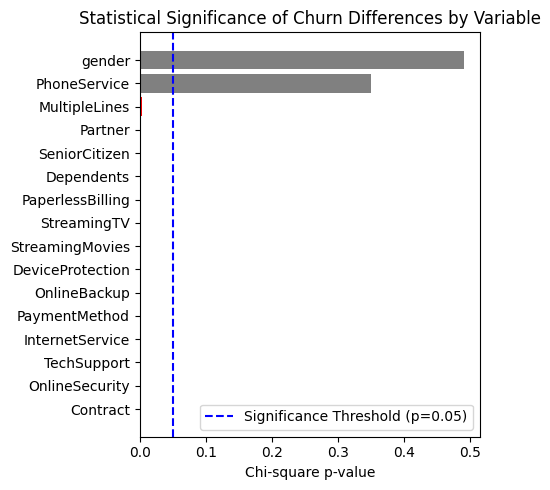

In [ ]:
# List of categorical variables
categorical_vars = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Collect p-values
p_values = {}
for col in categorical_vars:
    ct = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(ct)
    p_values[col] = p

# Convert to DataFrame and sort
p_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p_value'])
p_df = p_df.sort_values(by='p_value')

# Plot
plt.figure(figsize=(5, 5))
colors = ['red' if p < 0.05 else 'gray' for p in p_df['p_value']]
plt.barh(p_df.index, p_df['p_value'], color=colors)
plt.axvline(x=0.05, color='blue', linestyle='--', label='Significance Threshold (p=0.05)')
plt.xlabel('Chi-square p-value')
plt.title('Statistical Significance of Churn Differences by Variable')
plt.legend()
plt.tight_layout()
plt.show()

*   The interaction between quantitative variables effectively differentiates churned and non-churned customers.

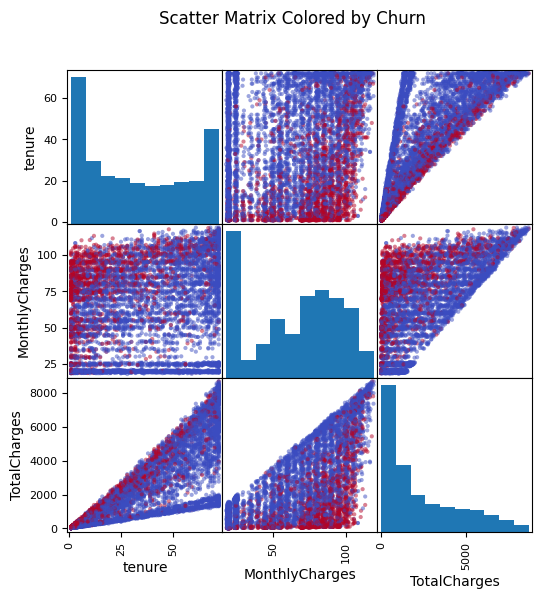

In [ ]:
# Convert 'Churn' to numeric: Yes → 1, No → 0
churn_numeric = df['Churn'].map({'No': 0, 'Yes': 1})

# Plot scatter matrix
pd.plotting.scatter_matrix(
    df[quantitative_columns],
    figsize=(6, 6),
    diagonal='hist',
    c=churn_numeric,
    cmap='coolwarm'
)

plt.suptitle("Scatter Matrix Colored by Churn", fontsize=12)
plt.show()


**7. Hypothesis based on EDA analysis:**

| Variable             | Hypothesis (Chi-Square Result)                                             | Business Interpretation                                                                               |
| -------------------- | -------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------- |
| **SeniorCitizen**    | Senior customers show a higher churn rate (significant).                   | Senior customers may face usability issues, limited digital engagement, or fixed-income sensitivity.  |
| **Partner**          | Customers without partners show higher churn (significant).                | Single customers are less tied to shared household services, hence more flexible to switch providers. |
| **Dependents**       | Customers without dependents show higher churn (significant).              | Families typically value stability and long-term plans.                                               |
| **PhoneService**     | No significant relationship with churn (p > 0.05).                         | Basic phone services are commoditized and do not influence loyalty.                                   |
| **MultipleLines**    | No significant relationship with churn (p > 0.05).                         | Having multiple lines doesn’t necessarily increase satisfaction or engagement.                        |
| **InternetService**  | Customers with **Fiber Optic** internet show higher churn (significant).   | Fiber customers might have higher expectations for speed and value, leading to dissatisfaction.       |
| **OnlineSecurity**   | Customers without online security show higher churn (significant).         | Online security enhances perceived value and trust.                                                   |
| **OnlineBackup**     | Customers without online backup show higher churn (significant).           | Backup services indicate deeper engagement and data reliance.                                         |
| **DeviceProtection** | Customers without device protection show higher churn (significant).       | Device protection reduces perceived service risk.                                                     |
| **TechSupport**      | Customers without tech support show higher churn (significant).            | Technical assistance improves satisfaction and reduces frustration.                                   |
| **StreamingTV**      | No significant relationship with churn (p > 0.05).                         | Entertainment features appear less critical to loyalty.                                               |
| **StreamingMovies**  | No significant relationship with churn (p > 0.05).                         | Similar to StreamingTV; not a key churn factor.                                                       |
| **Contract**         | Month-to-month customers show higher churn (strongly significant).         | Short-term contracts reduce customer commitment and increase switching risk.                          |
| **PaperlessBilling** | Customers with paperless billing show higher churn (significant).          | Digitally savvy users may be more price-sensitive and prone to switching.                             |
| **PaymentMethod**    | Customers paying via **Electronic Check** show higher churn (significant). | Manual payment methods cause friction; automated payment users are more retained.                     |


| Variable           | Hypothesis (Correlation / Scatter Analysis Result)        | Business Interpretation                                                                 |
| ------------------ | --------------------------------------------------------- | --------------------------------------------------------------------------------------- |
| **Tenure**         | Customers with lower tenure tend to churn more.           | Newer customers are less loyal and may not yet perceive long-term value in the service. |
| **MonthlyCharges** | Customers with higher monthly charges tend to churn more. | High costs may lead to dissatisfaction or price-driven switching behavior.              |
| **TotalCharges**   | Customers with lower total charges tend to churn more.    | Customers who haven’t built a long billing history are likely newer and less committed. |


# **Data Prepration and Pipeline Creation**

In [ ]:
# Previously we handled the missing data by dropping them (as we had few missinng data)
# Inconsistent records has chacked

## Train-Test split

In [ ]:
# Take a look at all features we have
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Training and Evaluating Models General Function

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

model_results = []

In [ ]:
from sklearn.linear_model import LogisticRegression

def model_training_function(
    X_train,
    y_train,
    X_test,
    y_test,
    algorithm_name,
    pipe,
    param_grid,
    model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
):

  # Fitting the Model
  grid = GridSearchCV(
      estimator=pipe,
      param_grid=param_grid,
      cv=5,
      scoring=scoring,
      n_jobs=n_jobs,
      verbose=verbose,
  )

  grid.fit(X_train, y_train)

  # Evaluating the model
  model_results.append(
      {
          "algorithm": algorithm_name,
          "best_params": grid.best_params_,
          "best_score": grid.best_score_,
      }
  )

  print(f"{algorithm_name}")
  print("="*100)
  print("Best parameters:", grid.best_params_)
  print("Best cross-val score:", round(grid.best_score_, 3))

  y_pred = grid.predict(X_test)
  print(classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(2, 2))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predicted No', 'Predicted Yes'],
              yticklabels=['Actual No', 'Actual Yes'])

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(f'Confusion Matrix Heatmap\n{algorithm_name}')
  plt.show()

  # Drawing ROC Curve Plot
  # Get the predicted probabilities for the positive class
  y_proba = grid.predict_proba(X_test)[:, 1]

  # Compute ROC curve and ROC area
  fpr, tpr, thresholds = roc_curve(y_test, y_proba)
  roc_auc = auc(fpr, tpr)

  # Plotting
  plt.figure(figsize=(4, 4))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random chance')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall)')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve\n{algorithm_name}')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()

  return grid


# **Scenario #1: Including all features**

## Selecting the features for the scenario

In [ ]:
Scenario_name = "S01"

binary_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'PaperlessBilling']
gender_col = ['gender']
multi_category_cols = ['InternetService', 'Contract', 'PaymentMethod']
quantitative_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
target_col = 'Churn'

# Defining the features and target variable
X = df[gender_col + binary_cols + multi_category_cols + quantitative_cols]
y = df[target_col].replace({'No': 0, 'Yes': 1})

/tmp/ipython-input-3928106232.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df[target_col].replace({'No': 0, 'Yes': 1})


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (5625, 19)
y_train shape: (5625,)
X_test shape: (1407, 19)
y_test shape: (1407,)


## Definint the pipelie:



1.   Harmonize → Clean dependent strings (No phone service → No, No internet service → No)
2.   Binary encoding → Yes/No → 1/0
3.   Multi-category → One-hot encoding
4.   Scaling numeric → StandardScaler / optional
5.   Machine Learning model (clf)


In [ ]:
# Harmonize → Clean dependent strings (No phone service → No, No internet service → No)
from sklearn.base import BaseEstimator, TransformerMixin

class HarmonizeDependentServiceLabels(BaseEstimator, TransformerMixin):
    def __init__(
        self,
        dependent_cols = {
            'MultipleLines': 'No phone service',
            'OnlineSecurity': 'No internet service',
            'OnlineBackup': 'No internet service',
            'DeviceProtection': 'No internet service',
            'TechSupport': 'No internet service',
            'StreamingTV': 'No internet service',
            'StreamingMovies': 'No internet service'
                 }
    ):
        self.dependent_cols = dependent_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        X = X.copy()

        for col_name, replace_value in self.dependent_cols.items():
          if col_name in X.columns:
            X[col_name] = X[col_name].replace({replace_value: 'No'})

        return X

In [ ]:
# Binary encoding → Yes/No → 1/0
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the column transformer with the correct encoders per columns
preprocessor = ColumnTransformer(
    transformers=[
        ('gender', OrdinalEncoder(categories=[['Female', 'Male']], dtype=int, handle_unknown='use_encoded_value', unknown_value=-1), gender_col),
        ('binary', OrdinalEncoder(categories=[['No','Yes']] * len(binary_cols), dtype=int, handle_unknown='use_encoded_value', unknown_value=-1), binary_cols),
        ('multi_category', OneHotEncoder(handle_unknown='ignore'), multi_category_cols),
        ('numeric', StandardScaler(), quantitative_cols)
    ],
    remainder='passthrough'
)

## Training and Evaluating Models

## **1) Logistic Regression**

| Parameter         | Meaning                                                                | Common Values / Notes                             |
| ----------------- | ---------------------------------------------------------------------- | ------------------------------------------------- |
| **C**             | Inverse of regularization strength (smaller = stronger regularization) | e.g. `0.001, 0.01, 0.1, 1, 10, 100`               |
| **penalty**       | Type of regularization                                                 | `'l1'`, `'l2'`, `'elasticnet'`, `'none'`          |
| **solver**        | Optimization algorithm used                                            | `'liblinear'`, `'lbfgs'`, `'saga'`, `'newton-cg'` |
| **max_iter**      | Max iterations to converge                                             | Usually 100–1000 (set higher if warning appears)  |
| **class_weight**  | Handles class imbalance                                                | `'balanced'` or `{0: weight_0, 1: weight_1}`      |
| **fit_intercept** | Whether to include intercept term                                      | Default: `True`                                   |
| **tol**           | Convergence tolerance                                                  | Default: `1e-4` (lower = more precise but slower) |
| **random_state**  | Random seed for reproducibility                                        | Usually `42`                                      |


Fitting 5 folds for each of 30 candidates, totalling 150 fits
S01 - Logistic Regression
Best parameters: {'model__C': 100, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best cross-val score: 0.846
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.63      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



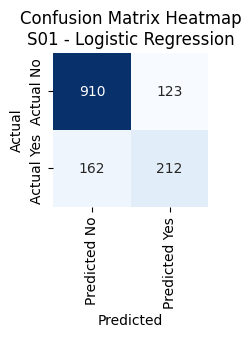

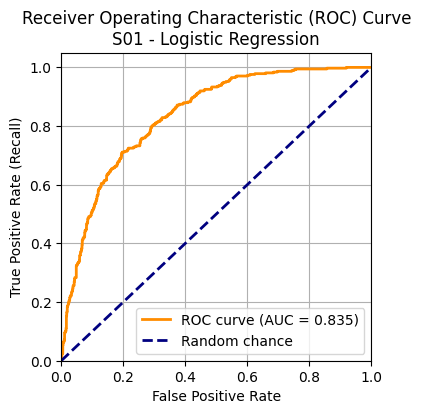

In [ ]:
from sklearn.linear_model import LogisticRegression

# Finalizaing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# Defining the gridsearch parameters to search
param_grid = [
    # L1 Regularization (Lasso)
    {
        'model__penalty': ['l1'],
        'model__solver': ['liblinear'],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__class_weight': [None, 'balanced']
    },

    # L2 Regularization (Ridge)
    {
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs', 'liblinear'],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__class_weight': [None, 'balanced']
    },

    # ElasticNet Regularization (Mix of L1 & L2)
    # {
    #     'model__penalty': ['elasticnet'],
    #     'model__solver': ['saga'],
    #     'model__l1_ratio': [0.25, 0.5, 0.75],
    #     'model__C': [0.01, 0.1, 1, 10, 100],
    #     'model__class_weight': [None, 'balanced']
    # }
]

# Training and Evaluating the model
lg = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - Logistic Regression",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

## **2. Tree-Based Models**

Rando Forest
| Parameter                    | Meaning                                                                                                    | Common Values / Notes                                              |
| ---------------------------- | ---------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------ |
| **n_estimators**             | Number of trees in the forest                                                                              | Typically `100`, `200`, `500` or more                              |
| **max_depth**                | Maximum depth of each tree                                                                                 | `None` (unlimited), or integers like `10`, `20`, `30`              |
| **min_samples_split**        | Minimum number of samples required to split an internal node                                               | Usually `2`, `5`, `10`                                             |
| **min_samples_leaf**         | Minimum number of samples required to be at a leaf node                                                    | Usually `1`, `2`, `4`                                              |
| **max_features**             | Number of features to consider when looking for the best split                                             | `'auto'` (all features), `'sqrt'`, `'log2'`, or float (e.g. `0.5`) |
| **bootstrap**                | Whether bootstrap samples are used when building trees                                                     | `True` (default) or `False`                                        |
| **class_weight**             | Weights associated with classes to handle imbalance                                                        | `None`, `'balanced'`, or `'balanced_subsample'`                    |
| **criterion**                | Function to measure the quality of a split                                                                 | `'gini'` (default) or `'entropy'`                                  |
| **max_leaf_nodes**           | Grow trees with a maximum number of leaf nodes                                                             | `None` (unlimited) or integer                                      |
| **min_weight_fraction_leaf** | Minimum weighted fraction of the sum total of weights (of all input samples) required to be at a leaf node | Default: `0.0`                                                     |
| **random_state**             | Seed for reproducibility                                                                                   | Usually `42`                                                       |
| **oob_score**                | Whether to use out-of-bag samples to estimate the generalization accuracy                                  | `True` or `False`                                                  |



Fitting 5 folds for each of 32 candidates, totalling 160 fits
S01 - Random Forest
Best parameters: {'model__class_weight': None, 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 100, 'model__min_samples_split': 100, 'model__n_estimators': 100}
Best cross-val score: 0.845
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.64      0.39      0.49       374

    accuracy                           0.78      1407
   macro avg       0.72      0.66      0.67      1407
weighted avg       0.76      0.78      0.76      1407



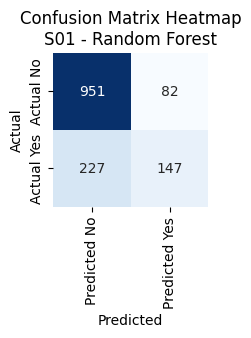

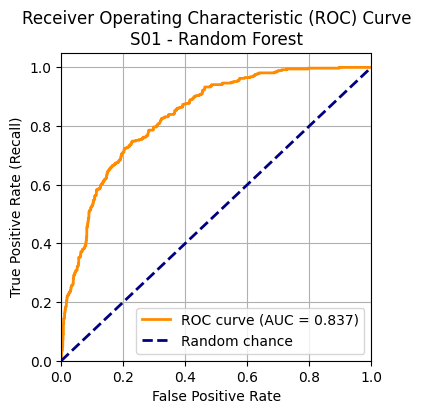

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Finalizaing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Defining the gridsearch parameters to search
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10],
    'model__min_samples_split': [100, 500],
    'model__min_samples_leaf': [100, 500],
    'model__max_features': ['sqrt', 0.5],         # Also 'auto', 'sqrt', 0.5
    'model__class_weight': [None]            # Also 'balanced', 'balanced_subsample'
}

# Training and Evaluating the model
rf = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - Random Forest",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

Extracting feature importance

/tmp/ipython-input-2148379932.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_10, palette='viridis')


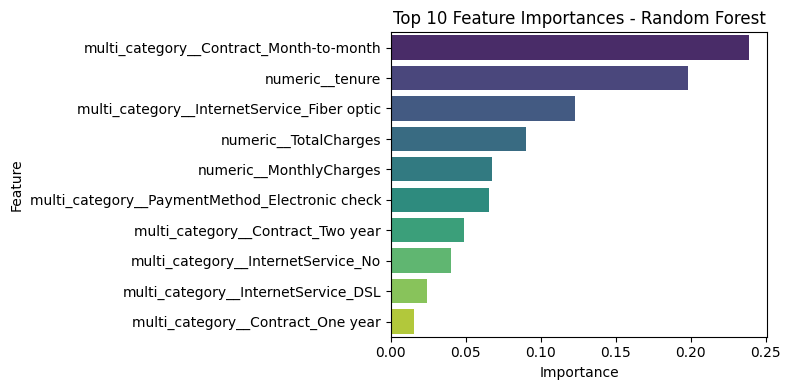

In [ ]:
# Get the best fitted pipeline from GridSearchCV
best_pipeline = rf.best_estimator_

# Get feature importances from this model
best_rf = best_pipeline.named_steps['model']
importances = best_rf.feature_importances_

# Get the feature names after preprocessing
feature_names = best_pipeline.named_steps['preprocess'].get_feature_names_out()

# Combine and display sorted importances
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Charting the top 10
top_10 = feat_imp_df.head(10)

# Plot horizontal bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='importance', y='feature', data=top_10, palette='viridis')

plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



XGBoost
| Parameter            | Meaning                                                                  | Common Values / Notes                                         |
| -------------------- | ------------------------------------------------------------------------ | ------------------------------------------------------------- |
| **n_estimators**     | Number of boosting rounds (trees)                                        | Typically 100–1000                                            |
| **max_depth**        | Maximum depth of a tree                                                  | Typical: 3–10                                                 |
| **learning_rate**    | Step size shrinkage to prevent overfitting (also called eta)             | Common: 0.01, 0.1, 0.2                                        |
| **subsample**        | Fraction of training samples used for each tree                          | Usually 0.5–1.0                                               |
| **colsample_bytree** | Fraction of features used per tree                                       | Usually 0.5–1.0                                               |
| **min_child_weight** | Minimum sum of instance weight (hessian) needed in a child               | Typical: 1, higher value can reduce overfitting               |
| **gamma**            | Minimum loss reduction required to make a further partition on a leaf    | Typical: 0 (no constraint) or higher to control complexity    |
| **scale_pos_weight** | Controls balance of positive and negative weights for unbalanced classes | Ratio of negative:positive samples, e.g., `sum(neg)/sum(pos)` |
| **reg_alpha**        | L1 regularization term on weights                                        | Usually 0 or small positive values                            |
| **reg_lambda**       | L2 regularization term on weights                                        | Usually 1 (default) or higher to control overfitting          |
| **objective**        | Specify learning task and corresponding loss function                    | e.g., `'binary:logistic'` for binary classification           |
| **eval_metric**      | Evaluation metric for validation data                                    | e.g., `'logloss'`, `'auc'`                                    |
| **random_state**     | Random seed for reproducibility                                          | Any integer, e.g., 42                                         |
| **verbosity**        | Controls the amount of messages printed                                  | 0 (silent), 1 (warning), 2 (info), 3 (debug)                  |


Fitting 5 folds for each of 144 candidates, totalling 720 fits
S01 - XGB Classifier
Best parameters: {'model__colsample_bytree': 0.7, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__scale_pos_weight': 1, 'model__subsample': 0.7}
Best cross-val score: 0.849
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:31:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


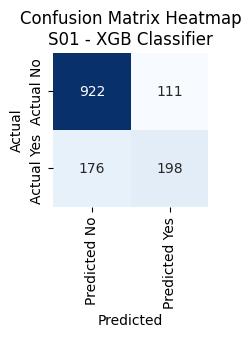

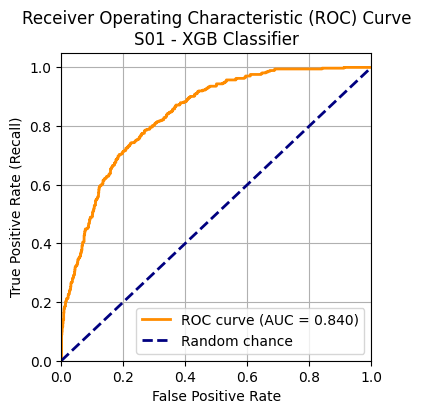

In [ ]:
from xgboost import XGBClassifier

# Finalizing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Defining the grid search parameters
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.7, 1],
    'model__colsample_bytree': [0.7, 1],
    'model__scale_pos_weight': [1, sum(y_train==0)/sum(y_train==1)]
}

# Training and Evaluating the model
xg = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - XGB Classifier",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

## **3. Support Vector Machine (SVM)**

| Parameter        | Meaning                                                                                                                 | Common Values / Notes                                          |
| ---------------- | ----------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------- |
| **C**            | Regularization parameter; controls trade-off between smooth decision boundary and classifying training points correctly | Typical range: `0.1, 1, 10, 100`                               |
| **kernel**       | Specifies the kernel type to be used in the algorithm                                                                   | `'linear'`, `'poly'`, `'rbf'` (default), `'sigmoid'`           |
| **degree**       | Degree of the polynomial kernel function (if `kernel='poly'`)                                                           | Default: `3`                                                   |
| **gamma**        | Kernel coefficient for `'rbf'`, `'poly'` and `'sigmoid'` kernels                                                        | `'scale'` (default), `'auto'`, or float values like `0.1`, `1` |
| **coef0**        | Independent term in kernel function (only for `'poly'` and `'sigmoid'`)                                                 | Default: `0.0`                                                 |
| **shrinking**    | Whether to use the shrinking heuristic                                                                                  | `True` (default), `False`                                      |
| **probability**  | Whether to enable probability estimates (slower, required for `predict_proba()`)                                        | `True` or `False` (default: `False`)                           |
| **tol**          | Tolerance for stopping criterion                                                                                        | Default: `1e-3`                                                |
| **class_weight** | Weights associated with classes to handle class imbalance                                                               | `None` (default), `'balanced'`, or dict                        |
| **max_iter**     | Hard limit on iterations within solver                                                                                  | `-1` (no limit) or positive integer                            |
| **random_state** | Seed for random number generator (when applicable)                                                                      | Integer or `None`                                              |


Fitting 5 folds for each of 5 candidates, totalling 25 fits
S01 - SVC Classifier
Best parameters: {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__gamma': 'auto', 'model__kernel': 'rbf'}
Best cross-val score: 0.842
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.72      0.74      1407



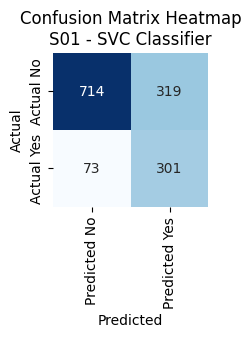

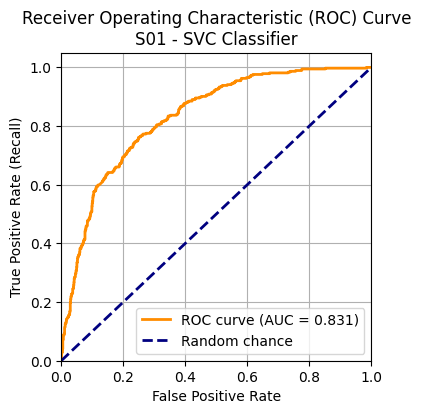

In [ ]:
from sklearn.svm import SVC

# Finalizing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', SVC(probability=True, random_state=42))  # probability=True for predict_proba
])

# Defining the grid search parameters
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__kernel': ['rbf'],         # 'linear', 'rbf'
    'model__gamma': ['auto'],          # 'scale', 'auto'
    'model__class_weight': ['balanced']   # None, 'balanced'
}

# Training and Evaluating the model
svc = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - SVC Classifier",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

## **4. k-Nearest Neighbors (k-NN)**

| Parameter         | Meaning                                                | Common Values / Notes                                                     |
| ----------------- | ------------------------------------------------------ | ------------------------------------------------------------------------- |
| **n_neighbors**   | Number of neighbors to use for prediction              | Typically `3, 5, 7, 10` (odd numbers preferred for classification)        |
| **weights**       | How to weight neighbor contributions                   | `'uniform'` (equal), `'distance'` (closer neighbors more weight)          |
| **algorithm**     | Algorithm used to compute nearest neighbors            | `'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'` (auto usually works well) |
| **leaf_size**     | Leaf size for tree-based algorithms (BallTree, KDTree) | Default: 30; affects speed and memory                                     |
| **metric**        | Distance metric for neighbors                          | `'minkowski'` (general), `'euclidean'` (p=2), `'manhattan'` (p=1)         |
| **p**             | Power parameter for Minkowski metric                   | `1` = Manhattan, `2` = Euclidean                                          |
| **metric_params** | Additional keyword arguments for the metric function   | Usually `None`                                                            |
| **n_jobs**        | Number of parallel jobs for computation                | `-1` for using all processors                                             |


Fitting 5 folds for each of 18 candidates, totalling 90 fits
S01 - KNN Classifier
Best parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 10, 'model__weights': 'uniform'}
Best cross-val score: 0.813
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.58      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.77      0.77      1407



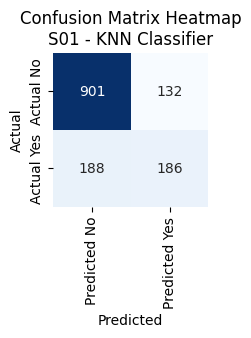

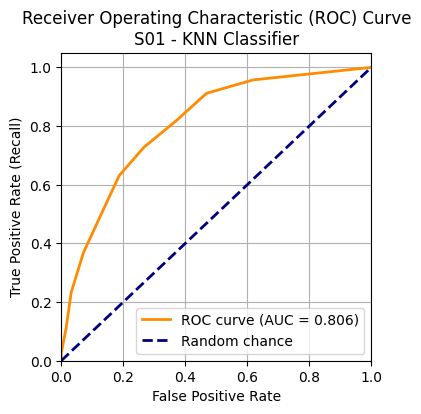

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Finalizing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier())
])

# Defining the grid search parameters
param_grid = {
    'model__n_neighbors': [3, 5, 10],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['minkowski', 'euclidean', 'manhattan']
}

# Training and Evaluating the model
knn = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - KNN Classifier",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

# **Scenario #2: Removing Gender and PhoneService**
Based on Chi Squar p-values


## Selecting the features for the scenario

In [ ]:
Scenario_name = "S02"

binary_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'PaperlessBilling']
# gender_col = ['gender']
multi_category_cols = ['InternetService', 'Contract', 'PaymentMethod']
quantitative_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
target_col = 'Churn'

# Defining the features and target variable
X = df[binary_cols + multi_category_cols + quantitative_cols]
y = df[target_col].replace({'No': 0, 'Yes': 1})

/tmp/ipython-input-1826659521.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df[target_col].replace({'No': 0, 'Yes': 1})


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (5625, 17)
y_train shape: (5625,)
X_test shape: (1407, 17)
y_test shape: (1407,)


## Definint the pipelie:



1.   Harmonize → Clean dependent strings (No phone service → No, No internet service → No)
2.   Binary encoding → Yes/No → 1/0
3.   Multi-category → One-hot encoding
4.   Scaling numeric → StandardScaler / optional
5.   Machine Learning model (clf)


In [ ]:
# Harmonize → Clean dependent strings (No phone service → No, No internet service → No)
from sklearn.base import BaseEstimator, TransformerMixin

class HarmonizeDependentServiceLabels(BaseEstimator, TransformerMixin):
    def __init__(
        self,
        dependent_cols = {
            'MultipleLines': 'No phone service',
            'OnlineSecurity': 'No internet service',
            'OnlineBackup': 'No internet service',
            'DeviceProtection': 'No internet service',
            'TechSupport': 'No internet service',
            'StreamingTV': 'No internet service',
            'StreamingMovies': 'No internet service'
                 }
    ):
        self.dependent_cols = dependent_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        X = X.copy()

        for col_name, replace_value in self.dependent_cols.items():
          if col_name in X.columns:
            X[col_name] = X[col_name].replace({replace_value: 'No'})

        return X

In [ ]:
# Binary encoding → Yes/No → 1/0
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the column transformer with the correct encoders per columns
preprocessor = ColumnTransformer(
    transformers=[
        # ('gender', OrdinalEncoder(categories=[['Female', 'Male']], dtype=int, handle_unknown='use_encoded_value', unknown_value=-1), gender_col),
        ('binary', OrdinalEncoder(categories=[['No','Yes']] * len(binary_cols), dtype=int, handle_unknown='use_encoded_value', unknown_value=-1), binary_cols),
        ('multi_category', OneHotEncoder(handle_unknown='ignore'), multi_category_cols),
        ('numeric', StandardScaler(), quantitative_cols)
    ],
    remainder='passthrough'
)

Training and Evaluating Models

## **1) Logistic Regression**

| Parameter         | Meaning                                                                | Common Values / Notes                             |
| ----------------- | ---------------------------------------------------------------------- | ------------------------------------------------- |
| **C**             | Inverse of regularization strength (smaller = stronger regularization) | e.g. `0.001, 0.01, 0.1, 1, 10, 100`               |
| **penalty**       | Type of regularization                                                 | `'l1'`, `'l2'`, `'elasticnet'`, `'none'`          |
| **solver**        | Optimization algorithm used                                            | `'liblinear'`, `'lbfgs'`, `'saga'`, `'newton-cg'` |
| **max_iter**      | Max iterations to converge                                             | Usually 100–1000 (set higher if warning appears)  |
| **class_weight**  | Handles class imbalance                                                | `'balanced'` or `{0: weight_0, 1: weight_1}`      |
| **fit_intercept** | Whether to include intercept term                                      | Default: `True`                                   |
| **tol**           | Convergence tolerance                                                  | Default: `1e-4` (lower = more precise but slower) |
| **random_state**  | Random seed for reproducibility                                        | Usually `42`                                      |


Fitting 5 folds for each of 30 candidates, totalling 150 fits
S02 - Logistic Regression
Best parameters: {'model__C': 100, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best cross-val score: 0.846
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



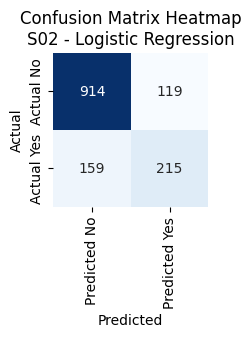

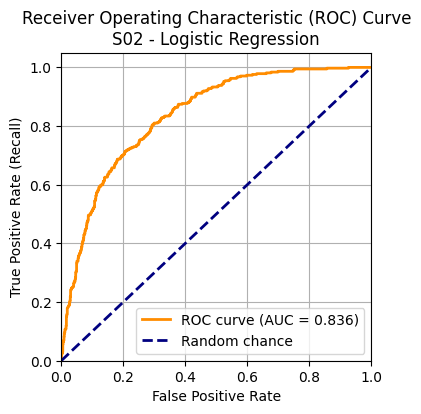

In [ ]:
from sklearn.linear_model import LogisticRegression

# Finalizaing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# Defining the gridsearch parameters to search
param_grid = [
    # L1 Regularization (Lasso)
    {
        'model__penalty': ['l1'],
        'model__solver': ['liblinear'],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__class_weight': [None, 'balanced']
    },

    # L2 Regularization (Ridge)
    {
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs', 'liblinear'],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__class_weight': [None, 'balanced']
    },

    # ElasticNet Regularization (Mix of L1 & L2)
    # {
    #     'model__penalty': ['elasticnet'],
    #     'model__solver': ['saga'],
    #     'model__l1_ratio': [0.25, 0.5, 0.75],
    #     'model__C': [0.01, 0.1, 1, 10, 100],
    #     'model__class_weight': [None, 'balanced']
    # }
]

# Training and Evaluating the model
lg = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - Logistic Regression",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

## **2. Tree-Based Models**

Rando Forest
| Parameter                    | Meaning                                                                                                    | Common Values / Notes                                              |
| ---------------------------- | ---------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------ |
| **n_estimators**             | Number of trees in the forest                                                                              | Typically `100`, `200`, `500` or more                              |
| **max_depth**                | Maximum depth of each tree                                                                                 | `None` (unlimited), or integers like `10`, `20`, `30`              |
| **min_samples_split**        | Minimum number of samples required to split an internal node                                               | Usually `2`, `5`, `10`                                             |
| **min_samples_leaf**         | Minimum number of samples required to be at a leaf node                                                    | Usually `1`, `2`, `4`                                              |
| **max_features**             | Number of features to consider when looking for the best split                                             | `'auto'` (all features), `'sqrt'`, `'log2'`, or float (e.g. `0.5`) |
| **bootstrap**                | Whether bootstrap samples are used when building trees                                                     | `True` (default) or `False`                                        |
| **class_weight**             | Weights associated with classes to handle imbalance                                                        | `None`, `'balanced'`, or `'balanced_subsample'`                    |
| **criterion**                | Function to measure the quality of a split                                                                 | `'gini'` (default) or `'entropy'`                                  |
| **max_leaf_nodes**           | Grow trees with a maximum number of leaf nodes                                                             | `None` (unlimited) or integer                                      |
| **min_weight_fraction_leaf** | Minimum weighted fraction of the sum total of weights (of all input samples) required to be at a leaf node | Default: `0.0`                                                     |
| **random_state**             | Seed for reproducibility                                                                                   | Usually `42`                                                       |
| **oob_score**                | Whether to use out-of-bag samples to estimate the generalization accuracy                                  | `True` or `False`                                                  |



Fitting 5 folds for each of 32 candidates, totalling 160 fits
S02 - Random Forest
Best parameters: {'model__class_weight': None, 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 100, 'model__min_samples_split': 100, 'model__n_estimators': 200}
Best cross-val score: 0.844
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1033
           1       0.66      0.40      0.49       374

    accuracy                           0.78      1407
   macro avg       0.73      0.66      0.68      1407
weighted avg       0.77      0.78      0.77      1407



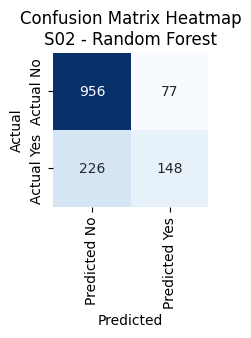

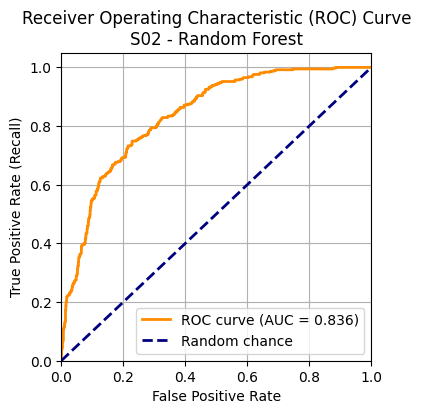

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Finalizaing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Defining the gridsearch parameters to search
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10],
    'model__min_samples_split': [100, 500],
    'model__min_samples_leaf': [100, 500],
    'model__max_features': ['sqrt', 0.5],         # Also 'auto', 'sqrt', 0.5
    'model__class_weight': [None]            # Also 'balanced', 'balanced_subsample'
}

# Training and Evaluating the model
rf = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - Random Forest",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

Extracting feature importance

/tmp/ipython-input-2148379932.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_10, palette='viridis')


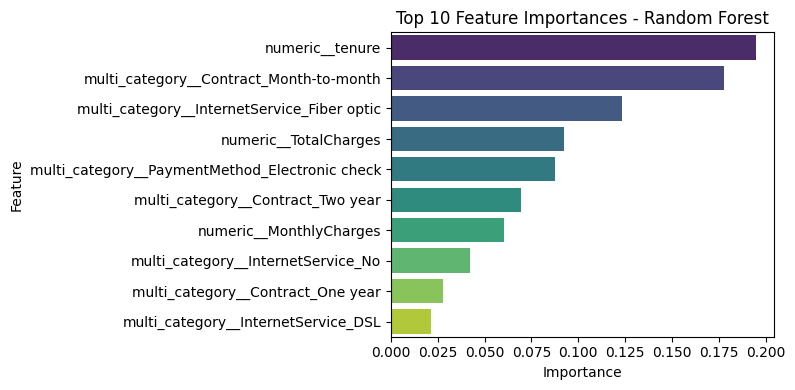

In [ ]:
# Get the best fitted pipeline from GridSearchCV
best_pipeline = rf.best_estimator_

# Get feature importances from this model
best_rf = best_pipeline.named_steps['model']
importances = best_rf.feature_importances_

# Get the feature names after preprocessing
feature_names = best_pipeline.named_steps['preprocess'].get_feature_names_out()

# Combine and display sorted importances
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Charting the top 10
top_10 = feat_imp_df.head(10)

# Plot horizontal bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='importance', y='feature', data=top_10, palette='viridis')

plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



XGBoost
| Parameter            | Meaning                                                                  | Common Values / Notes                                         |
| -------------------- | ------------------------------------------------------------------------ | ------------------------------------------------------------- |
| **n_estimators**     | Number of boosting rounds (trees)                                        | Typically 100–1000                                            |
| **max_depth**        | Maximum depth of a tree                                                  | Typical: 3–10                                                 |
| **learning_rate**    | Step size shrinkage to prevent overfitting (also called eta)             | Common: 0.01, 0.1, 0.2                                        |
| **subsample**        | Fraction of training samples used for each tree                          | Usually 0.5–1.0                                               |
| **colsample_bytree** | Fraction of features used per tree                                       | Usually 0.5–1.0                                               |
| **min_child_weight** | Minimum sum of instance weight (hessian) needed in a child               | Typical: 1, higher value can reduce overfitting               |
| **gamma**            | Minimum loss reduction required to make a further partition on a leaf    | Typical: 0 (no constraint) or higher to control complexity    |
| **scale_pos_weight** | Controls balance of positive and negative weights for unbalanced classes | Ratio of negative:positive samples, e.g., `sum(neg)/sum(pos)` |
| **reg_alpha**        | L1 regularization term on weights                                        | Usually 0 or small positive values                            |
| **reg_lambda**       | L2 regularization term on weights                                        | Usually 1 (default) or higher to control overfitting          |
| **objective**        | Specify learning task and corresponding loss function                    | e.g., `'binary:logistic'` for binary classification           |
| **eval_metric**      | Evaluation metric for validation data                                    | e.g., `'logloss'`, `'auc'`                                    |
| **random_state**     | Random seed for reproducibility                                          | Any integer, e.g., 42                                         |
| **verbosity**        | Controls the amount of messages printed                                  | 0 (silent), 1 (warning), 2 (info), 3 (debug)                  |


Fitting 5 folds for each of 144 candidates, totalling 720 fits
S02 - XGB Classifier
Best parameters: {'model__colsample_bytree': 1, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__scale_pos_weight': 1, 'model__subsample': 0.7}
Best cross-val score: 0.847
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:38:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


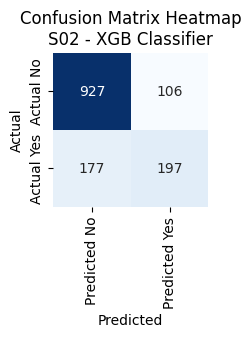

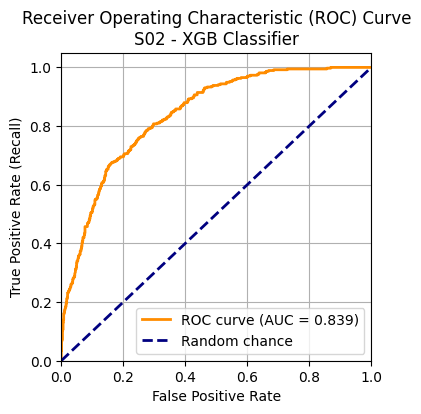

In [ ]:
from xgboost import XGBClassifier

# Finalizing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Defining the grid search parameters
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.7, 1],
    'model__colsample_bytree': [0.7, 1],
    'model__scale_pos_weight': [1, sum(y_train==0)/sum(y_train==1)]
}

# Training and Evaluating the model
xg = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - XGB Classifier",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

## **3. Support Vector Machine (SVM)**

| Parameter        | Meaning                                                                                                                 | Common Values / Notes                                          |
| ---------------- | ----------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------- |
| **C**            | Regularization parameter; controls trade-off between smooth decision boundary and classifying training points correctly | Typical range: `0.1, 1, 10, 100`                               |
| **kernel**       | Specifies the kernel type to be used in the algorithm                                                                   | `'linear'`, `'poly'`, `'rbf'` (default), `'sigmoid'`           |
| **degree**       | Degree of the polynomial kernel function (if `kernel='poly'`)                                                           | Default: `3`                                                   |
| **gamma**        | Kernel coefficient for `'rbf'`, `'poly'` and `'sigmoid'` kernels                                                        | `'scale'` (default), `'auto'`, or float values like `0.1`, `1` |
| **coef0**        | Independent term in kernel function (only for `'poly'` and `'sigmoid'`)                                                 | Default: `0.0`                                                 |
| **shrinking**    | Whether to use the shrinking heuristic                                                                                  | `True` (default), `False`                                      |
| **probability**  | Whether to enable probability estimates (slower, required for `predict_proba()`)                                        | `True` or `False` (default: `False`)                           |
| **tol**          | Tolerance for stopping criterion                                                                                        | Default: `1e-3`                                                |
| **class_weight** | Weights associated with classes to handle class imbalance                                                               | `None` (default), `'balanced'`, or dict                        |
| **max_iter**     | Hard limit on iterations within solver                                                                                  | `-1` (no limit) or positive integer                            |
| **random_state** | Seed for random number generator (when applicable)                                                                      | Integer or `None`                                              |


Fitting 5 folds for each of 5 candidates, totalling 25 fits
S02 - SVC Classifier
Best parameters: {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__gamma': 'auto', 'model__kernel': 'rbf'}
Best cross-val score: 0.84
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.80      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407



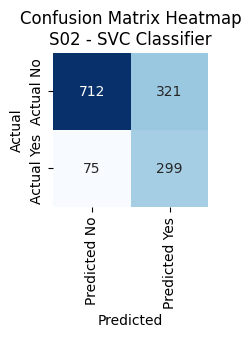

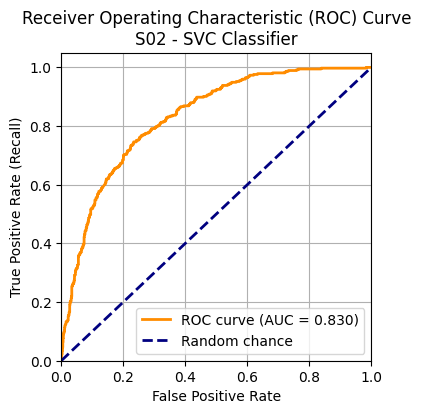

In [ ]:
from sklearn.svm import SVC

# Finalizing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', SVC(probability=True, random_state=42))  # probability=True for predict_proba
])

# Defining the grid search parameters
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__kernel': ['rbf'],         # 'linear', 'rbf'
    'model__gamma': ['auto'],          # 'scale', 'auto'
    'model__class_weight': ['balanced']   # None, 'balanced'
}

# Training and Evaluating the model
svc = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - SVC Classifier",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

## **4. k-Nearest Neighbors (k-NN)**

| Parameter         | Meaning                                                | Common Values / Notes                                                     |
| ----------------- | ------------------------------------------------------ | ------------------------------------------------------------------------- |
| **n_neighbors**   | Number of neighbors to use for prediction              | Typically `3, 5, 7, 10` (odd numbers preferred for classification)        |
| **weights**       | How to weight neighbor contributions                   | `'uniform'` (equal), `'distance'` (closer neighbors more weight)          |
| **algorithm**     | Algorithm used to compute nearest neighbors            | `'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'` (auto usually works well) |
| **leaf_size**     | Leaf size for tree-based algorithms (BallTree, KDTree) | Default: 30; affects speed and memory                                     |
| **metric**        | Distance metric for neighbors                          | `'minkowski'` (general), `'euclidean'` (p=2), `'manhattan'` (p=1)         |
| **p**             | Power parameter for Minkowski metric                   | `1` = Manhattan, `2` = Euclidean                                          |
| **metric_params** | Additional keyword arguments for the metric function   | Usually `None`                                                            |
| **n_jobs**        | Number of parallel jobs for computation                | `-1` for using all processors                                             |


Fitting 5 folds for each of 18 candidates, totalling 90 fits
S02 - KNN Classifier
Best parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 10, 'model__weights': 'uniform'}
Best cross-val score: 0.81
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



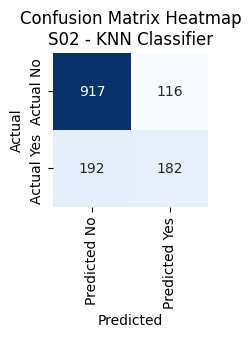

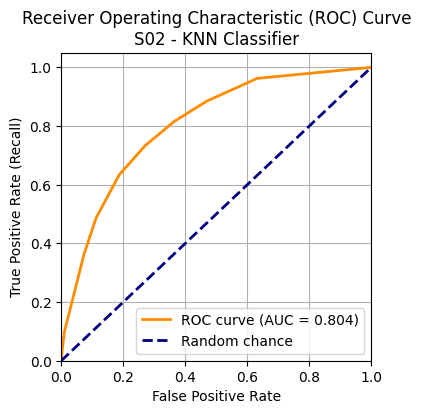

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Finalizing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier())
])

# Defining the grid search parameters
param_grid = {
    'model__n_neighbors': [3, 5, 10],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['minkowski', 'euclidean', 'manhattan']
}

# Training and Evaluating the model
knn = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - KNN Classifier",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

# **Scenario #3: Focusing on top 10 variables**
Based on Random Forests feature importance


## Selecting the features for the scenario

In [ ]:
Scenario_name = "S03"

# binary_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
#                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
#                'StreamingMovies', 'PaperlessBilling']
# gender_col = ['gender']
multi_category_cols = ['InternetService', 'Contract', 'PaymentMethod']
quantitative_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
target_col = 'Churn'

# Defining the features and target variable
X = df[multi_category_cols + quantitative_cols]
y = df[target_col].replace({'No': 0, 'Yes': 1})

/tmp/ipython-input-3267494404.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df[target_col].replace({'No': 0, 'Yes': 1})


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (5625, 6)
y_train shape: (5625,)
X_test shape: (1407, 6)
y_test shape: (1407,)


## Definint the pipelie:



1.   Harmonize → Clean dependent strings (No phone service → No, No internet service → No)
2.   Binary encoding → Yes/No → 1/0
3.   Multi-category → One-hot encoding
4.   Scaling numeric → StandardScaler / optional
5.   Machine Learning model (clf)


In [ ]:
# Harmonize → Clean dependent strings (No phone service → No, No internet service → No)
from sklearn.base import BaseEstimator, TransformerMixin

class HarmonizeDependentServiceLabels(BaseEstimator, TransformerMixin):
    def __init__(
        self,
        dependent_cols = {
            'MultipleLines': 'No phone service',
            'OnlineSecurity': 'No internet service',
            'OnlineBackup': 'No internet service',
            'DeviceProtection': 'No internet service',
            'TechSupport': 'No internet service',
            'StreamingTV': 'No internet service',
            'StreamingMovies': 'No internet service'
                 }
    ):
        self.dependent_cols = dependent_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        X = X.copy()

        for col_name, replace_value in self.dependent_cols.items():
          if col_name in X.columns:
            X[col_name] = X[col_name].replace({replace_value: 'No'})

        return X

In [ ]:
# Binary encoding → Yes/No → 1/0
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the column transformer with the correct encoders per columns
preprocessor = ColumnTransformer(
    transformers=[
        # ('gender', OrdinalEncoder(categories=[['Female', 'Male']], dtype=int, handle_unknown='use_encoded_value', unknown_value=-1), gender_col),
        # ('binary', OrdinalEncoder(categories=[['No','Yes']] * len(binary_cols), dtype=int, handle_unknown='use_encoded_value', unknown_value=-1), binary_cols),
        ('multi_category', OneHotEncoder(handle_unknown='ignore'), multi_category_cols),
        ('numeric', StandardScaler(), quantitative_cols)
    ],
    remainder='passthrough'
)

Training and Evaluating Models

## **1) Logistic Regression**

| Parameter         | Meaning                                                                | Common Values / Notes                             |
| ----------------- | ---------------------------------------------------------------------- | ------------------------------------------------- |
| **C**             | Inverse of regularization strength (smaller = stronger regularization) | e.g. `0.001, 0.01, 0.1, 1, 10, 100`               |
| **penalty**       | Type of regularization                                                 | `'l1'`, `'l2'`, `'elasticnet'`, `'none'`          |
| **solver**        | Optimization algorithm used                                            | `'liblinear'`, `'lbfgs'`, `'saga'`, `'newton-cg'` |
| **max_iter**      | Max iterations to converge                                             | Usually 100–1000 (set higher if warning appears)  |
| **class_weight**  | Handles class imbalance                                                | `'balanced'` or `{0: weight_0, 1: weight_1}`      |
| **fit_intercept** | Whether to include intercept term                                      | Default: `True`                                   |
| **tol**           | Convergence tolerance                                                  | Default: `1e-4` (lower = more precise but slower) |
| **random_state**  | Random seed for reproducibility                                        | Usually `42`                                      |


Fitting 5 folds for each of 30 candidates, totalling 150 fits
S03 - Logistic Regression
Best parameters: {'model__C': 100, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best cross-val score: 0.837
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



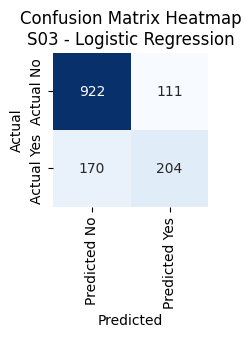

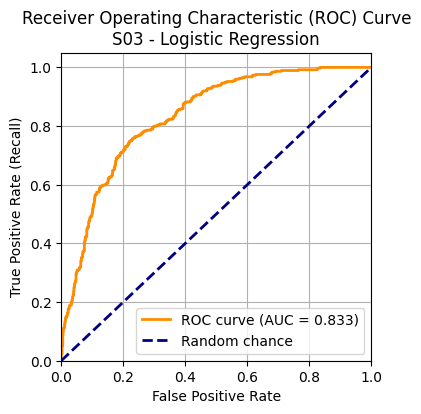

In [ ]:
from sklearn.linear_model import LogisticRegression

# Finalizaing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# Defining the gridsearch parameters to search
param_grid = [
    # L1 Regularization (Lasso)
    {
        'model__penalty': ['l1'],
        'model__solver': ['liblinear'],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__class_weight': [None, 'balanced']
    },

    # L2 Regularization (Ridge)
    {
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs', 'liblinear'],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__class_weight': [None, 'balanced']
    },

    # ElasticNet Regularization (Mix of L1 & L2)
    # {
    #     'model__penalty': ['elasticnet'],
    #     'model__solver': ['saga'],
    #     'model__l1_ratio': [0.25, 0.5, 0.75],
    #     'model__C': [0.01, 0.1, 1, 10, 100],
    #     'model__class_weight': [None, 'balanced']
    # }
]

# Training and Evaluating the model
lg = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - Logistic Regression",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

## **2. Tree-Based Models**

Rando Forest
| Parameter                    | Meaning                                                                                                    | Common Values / Notes                                              |
| ---------------------------- | ---------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------ |
| **n_estimators**             | Number of trees in the forest                                                                              | Typically `100`, `200`, `500` or more                              |
| **max_depth**                | Maximum depth of each tree                                                                                 | `None` (unlimited), or integers like `10`, `20`, `30`              |
| **min_samples_split**        | Minimum number of samples required to split an internal node                                               | Usually `2`, `5`, `10`                                             |
| **min_samples_leaf**         | Minimum number of samples required to be at a leaf node                                                    | Usually `1`, `2`, `4`                                              |
| **max_features**             | Number of features to consider when looking for the best split                                             | `'auto'` (all features), `'sqrt'`, `'log2'`, or float (e.g. `0.5`) |
| **bootstrap**                | Whether bootstrap samples are used when building trees                                                     | `True` (default) or `False`                                        |
| **class_weight**             | Weights associated with classes to handle imbalance                                                        | `None`, `'balanced'`, or `'balanced_subsample'`                    |
| **criterion**                | Function to measure the quality of a split                                                                 | `'gini'` (default) or `'entropy'`                                  |
| **max_leaf_nodes**           | Grow trees with a maximum number of leaf nodes                                                             | `None` (unlimited) or integer                                      |
| **min_weight_fraction_leaf** | Minimum weighted fraction of the sum total of weights (of all input samples) required to be at a leaf node | Default: `0.0`                                                     |
| **random_state**             | Seed for reproducibility                                                                                   | Usually `42`                                                       |
| **oob_score**                | Whether to use out-of-bag samples to estimate the generalization accuracy                                  | `True` or `False`                                                  |



Fitting 5 folds for each of 32 candidates, totalling 160 fits
S03 - Random Forest
Best parameters: {'model__class_weight': None, 'model__max_depth': 10, 'model__max_features': 0.5, 'model__min_samples_leaf': 100, 'model__min_samples_split': 100, 'model__n_estimators': 100}
Best cross-val score: 0.842
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



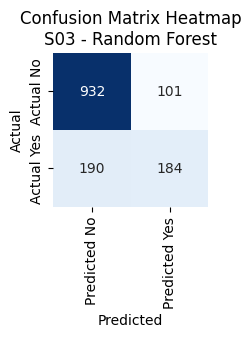

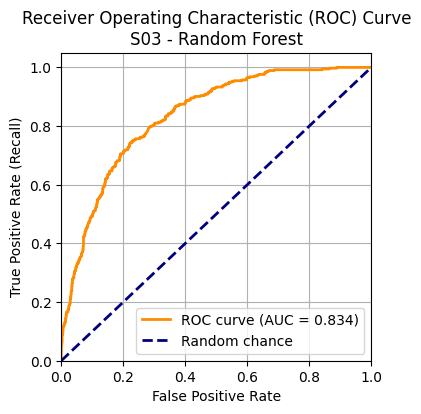

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Finalizaing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Defining the gridsearch parameters to search
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10],
    'model__min_samples_split': [100, 500],
    'model__min_samples_leaf': [100, 500],
    'model__max_features': ['sqrt', 0.5],         # Also 'auto', 'sqrt', 0.5
    'model__class_weight': [None]            # Also 'balanced', 'balanced_subsample'
}

# Training and Evaluating the model
rf = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - Random Forest",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

Extracting feature importance

/tmp/ipython-input-2148379932.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_10, palette='viridis')


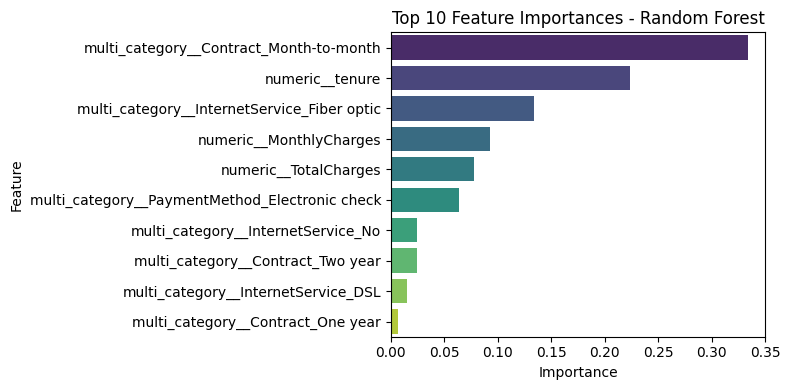

In [ ]:
# Get the best fitted pipeline from GridSearchCV
best_pipeline = rf.best_estimator_

# Get feature importances from this model
best_rf = best_pipeline.named_steps['model']
importances = best_rf.feature_importances_

# Get the feature names after preprocessing
feature_names = best_pipeline.named_steps['preprocess'].get_feature_names_out()

# Combine and display sorted importances
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Charting the top 10
top_10 = feat_imp_df.head(10)

# Plot horizontal bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='importance', y='feature', data=top_10, palette='viridis')

plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



XGBoost
| Parameter            | Meaning                                                                  | Common Values / Notes                                         |
| -------------------- | ------------------------------------------------------------------------ | ------------------------------------------------------------- |
| **n_estimators**     | Number of boosting rounds (trees)                                        | Typically 100–1000                                            |
| **max_depth**        | Maximum depth of a tree                                                  | Typical: 3–10                                                 |
| **learning_rate**    | Step size shrinkage to prevent overfitting (also called eta)             | Common: 0.01, 0.1, 0.2                                        |
| **subsample**        | Fraction of training samples used for each tree                          | Usually 0.5–1.0                                               |
| **colsample_bytree** | Fraction of features used per tree                                       | Usually 0.5–1.0                                               |
| **min_child_weight** | Minimum sum of instance weight (hessian) needed in a child               | Typical: 1, higher value can reduce overfitting               |
| **gamma**            | Minimum loss reduction required to make a further partition on a leaf    | Typical: 0 (no constraint) or higher to control complexity    |
| **scale_pos_weight** | Controls balance of positive and negative weights for unbalanced classes | Ratio of negative:positive samples, e.g., `sum(neg)/sum(pos)` |
| **reg_alpha**        | L1 regularization term on weights                                        | Usually 0 or small positive values                            |
| **reg_lambda**       | L2 regularization term on weights                                        | Usually 1 (default) or higher to control overfitting          |
| **objective**        | Specify learning task and corresponding loss function                    | e.g., `'binary:logistic'` for binary classification           |
| **eval_metric**      | Evaluation metric for validation data                                    | e.g., `'logloss'`, `'auc'`                                    |
| **random_state**     | Random seed for reproducibility                                          | Any integer, e.g., 42                                         |
| **verbosity**        | Controls the amount of messages printed                                  | 0 (silent), 1 (warning), 2 (info), 3 (debug)                  |


Fitting 5 folds for each of 144 candidates, totalling 720 fits
S03 - XGB Classifier
Best parameters: {'model__colsample_bytree': 0.7, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__scale_pos_weight': 1, 'model__subsample': 0.7}
Best cross-val score: 0.843
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:45:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


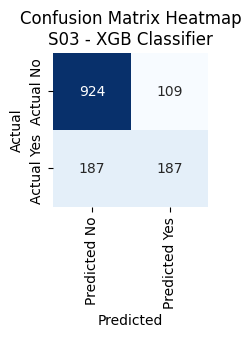

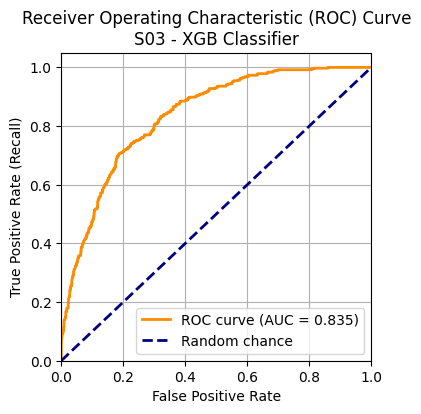

In [ ]:
from xgboost import XGBClassifier

# Finalizing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Defining the grid search parameters
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.7, 1],
    'model__colsample_bytree': [0.7, 1],
    'model__scale_pos_weight': [1, sum(y_train==0)/sum(y_train==1)]
}

# Training and Evaluating the model
xg = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - XGB Classifier",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

## **3. Support Vector Machine (SVM)**

| Parameter        | Meaning                                                                                                                 | Common Values / Notes                                          |
| ---------------- | ----------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------- |
| **C**            | Regularization parameter; controls trade-off between smooth decision boundary and classifying training points correctly | Typical range: `0.1, 1, 10, 100`                               |
| **kernel**       | Specifies the kernel type to be used in the algorithm                                                                   | `'linear'`, `'poly'`, `'rbf'` (default), `'sigmoid'`           |
| **degree**       | Degree of the polynomial kernel function (if `kernel='poly'`)                                                           | Default: `3`                                                   |
| **gamma**        | Kernel coefficient for `'rbf'`, `'poly'` and `'sigmoid'` kernels                                                        | `'scale'` (default), `'auto'`, or float values like `0.1`, `1` |
| **coef0**        | Independent term in kernel function (only for `'poly'` and `'sigmoid'`)                                                 | Default: `0.0`                                                 |
| **shrinking**    | Whether to use the shrinking heuristic                                                                                  | `True` (default), `False`                                      |
| **probability**  | Whether to enable probability estimates (slower, required for `predict_proba()`)                                        | `True` or `False` (default: `False`)                           |
| **tol**          | Tolerance for stopping criterion                                                                                        | Default: `1e-3`                                                |
| **class_weight** | Weights associated with classes to handle class imbalance                                                               | `None` (default), `'balanced'`, or dict                        |
| **max_iter**     | Hard limit on iterations within solver                                                                                  | `-1` (no limit) or positive integer                            |
| **random_state** | Seed for random number generator (when applicable)                                                                      | Integer or `None`                                              |


Fitting 5 folds for each of 5 candidates, totalling 25 fits
S03 - SVC Classifier
Best parameters: {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__gamma': 'auto', 'model__kernel': 'rbf'}
Best cross-val score: 0.832
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1033
           1       0.46      0.80      0.59       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.79      0.70      0.72      1407



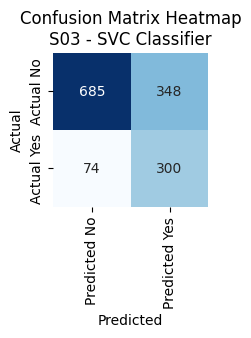

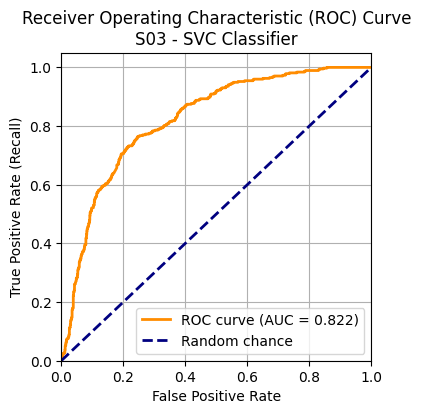

In [ ]:
from sklearn.svm import SVC

# Finalizing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', SVC(probability=True, random_state=42))  # probability=True for predict_proba
])

# Defining the grid search parameters
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__kernel': ['rbf'],         # 'linear', 'rbf'
    'model__gamma': ['auto'],          # 'scale', 'auto'
    'model__class_weight': ['balanced']   # None, 'balanced'
}

# Training and Evaluating the model
svc = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - SVC Classifier",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

## **4. k-Nearest Neighbors (k-NN)**

| Parameter         | Meaning                                                | Common Values / Notes                                                     |
| ----------------- | ------------------------------------------------------ | ------------------------------------------------------------------------- |
| **n_neighbors**   | Number of neighbors to use for prediction              | Typically `3, 5, 7, 10` (odd numbers preferred for classification)        |
| **weights**       | How to weight neighbor contributions                   | `'uniform'` (equal), `'distance'` (closer neighbors more weight)          |
| **algorithm**     | Algorithm used to compute nearest neighbors            | `'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'` (auto usually works well) |
| **leaf_size**     | Leaf size for tree-based algorithms (BallTree, KDTree) | Default: 30; affects speed and memory                                     |
| **metric**        | Distance metric for neighbors                          | `'minkowski'` (general), `'euclidean'` (p=2), `'manhattan'` (p=1)         |
| **p**             | Power parameter for Minkowski metric                   | `1` = Manhattan, `2` = Euclidean                                          |
| **metric_params** | Additional keyword arguments for the metric function   | Usually `None`                                                            |
| **n_jobs**        | Number of parallel jobs for computation                | `-1` for using all processors                                             |


Fitting 5 folds for each of 18 candidates, totalling 90 fits
S03 - KNN Classifier
Best parameters: {'model__metric': 'minkowski', 'model__n_neighbors': 10, 'model__weights': 'uniform'}
Best cross-val score: 0.817
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1033
           1       0.59      0.42      0.49       374

    accuracy                           0.77      1407
   macro avg       0.70      0.66      0.67      1407
weighted avg       0.75      0.77      0.76      1407



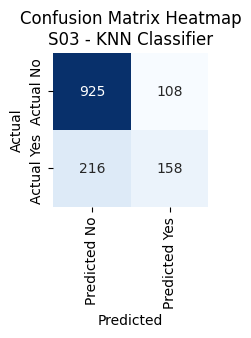

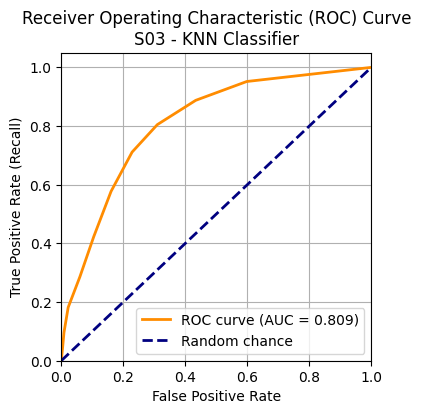

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Finalizing the pipeline
pipe = Pipeline([
    ('harmonize', HarmonizeDependentServiceLabels()),
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier())
])

# Defining the grid search parameters
param_grid = {
    'model__n_neighbors': [3, 5, 10],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['minkowski', 'euclidean', 'manhattan']
}

# Training and Evaluating the model
knn = model_training_function(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    algorithm_name=f"{Scenario_name} - KNN Classifier",
    pipe=pipe,
    param_grid=param_grid,
    model_results=model_results,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
)

# **Comparing Models**

In [ ]:
results_df = pd.DataFrame(model_results)
results_df

,algorithm,best_params,best_score
0,S01 - Logistic Regression,"{'model__C': 100, 'model__class_weight': None,...",0.846243
1,S01 - Random Forest,"{'model__class_weight': None, 'model__max_dept...",0.844698
2,S01 - XGB Classifier,"{'model__colsample_bytree': 0.7, 'model__learn...",0.848788
3,S01 - SVC Classifier,"{'model__C': 0.1, 'model__class_weight': 'bala...",0.841895
4,S01 - KNN Classifier,"{'model__metric': 'manhattan', 'model__n_neigh...",0.813473
5,S02 - Logistic Regression,"{'model__C': 100, 'model__class_weight': None,...",0.846380
6,S02 - Random Forest,"{'model__class_weight': None, 'model__max_dept...",0.843503
7,S02 - XGB Classifier,"{'model__colsample_bytree': 1, 'model__learnin...",0.846736
8,S02 - SVC Classifier,"{'model__C': 0.1, 'model__class_weight': 'bala...",0.840481
9,S02 - KNN Classifier,"{'model__metric': 'manhattan', 'model__n_neigh...",0.810028


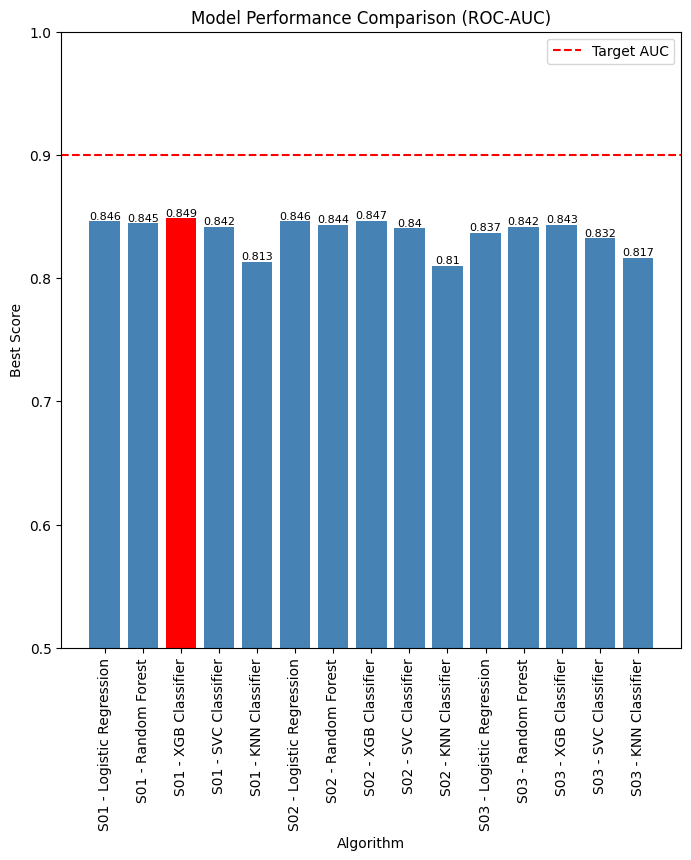

In [ ]:
plt.figure(figsize=(8, 8))

# setting the color (make the bar with max red)
max_index = results_df['best_score'].idxmax()
colors = ['red' if i == max_index else 'steelblue' for i in range(len(results_df))]

plt.bar(results_df['algorithm'], results_df['best_score'], color=colors)

for i, v in enumerate(results_df['best_score']):
  plt.text(i, v, str(round(v, 3)), ha='center', va='bottom', fontsize=8)

plt.axhline(y=0.9, color='red', linestyle='--', linewidth=1.5, label='Target AUC')

plt.title('Model Performance Comparison (ROC-AUC)')
plt.xticks(rotation=90)
plt.xlabel('Algorithm')
plt.ylabel('Best Score')
plt.legend()
plt.ylim(0.5, 1)

plt.show()